<a href="https://colab.research.google.com/github/jidhu-mohan/KNN_K-Nearest-Neighbor/blob/master/knn_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - Sales Conversion Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import libs

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

## Read data from file

In [3]:
# Importing the dataset
# dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset = pd.read_csv("https://raw.githubusercontent.com/jidhu-mohan/KNN_K-Nearest-Neighbor/refs/heads/master/data/Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


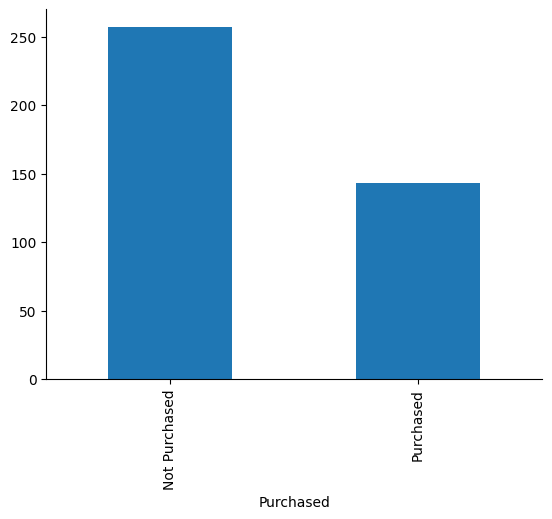

In [4]:
dataset.groupby('Purchased').size().plot(kind='bar').xaxis.set_ticklabels(['Not Purchased','Purchased'])
plt.gca().spines[['top', 'right',]].set_visible(False)

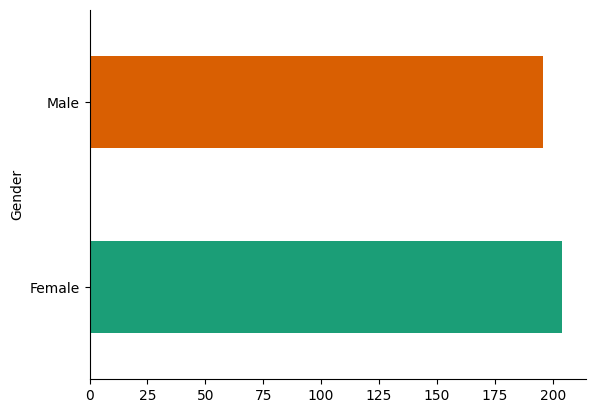

In [5]:
dataset.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

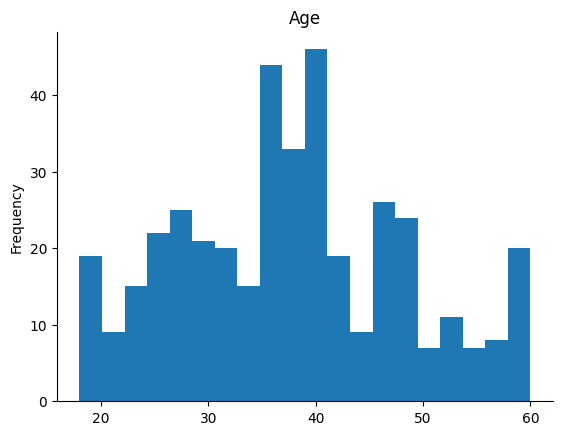

In [6]:
dataset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

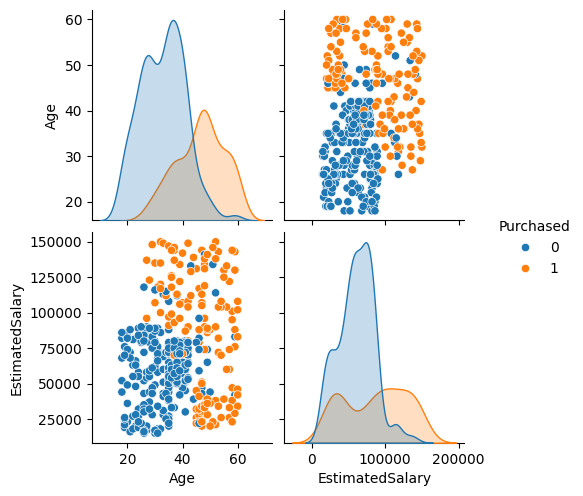

In [7]:
sns.pairplot(dataset.iloc[:,[1,2,3,4]], hue = "Purchased")

In [8]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [9]:
# print(X)
# print(y)

## Train test split

In [10]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

## Feature Scaling

In [11]:
# Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Fit KNN

In [12]:
# Fitting classifier to the Training set
classifier = KNeighborsClassifier(n_neighbors=5,
                                  metric='minkowski',
                                  p=2)
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

## Predict

In [13]:
# Predicting the Test set results
y_pred_test = classifier.predict(X_test_scaled)


In [14]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[64,  4],
       [ 3, 29]])

In [15]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_train, classifier.predict(X_train_scaled))
print("Accuracy:", accuracy*100)

Accuracy: 91.0


In [16]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy*100)

Accuracy: 93.0


## Predict for new customer

In [17]:
age = input("Customer Age:")
salary = input("Estimated Salary:")
new_pred = classifier.predict(sc.transform(np.array([[age, salary]])))
if new_pred[0] == 0:
    print("Customer will not buy")
else:
    print("Customer will buy")
# new_pred

Customer Age:25
Estimated Salary:150000
Customer will buy


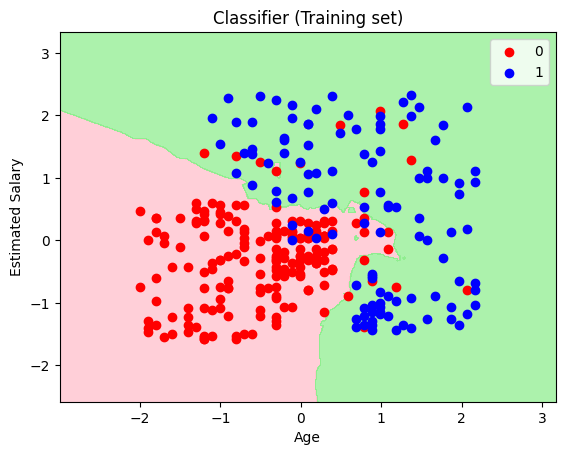

In [18]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train_scaled, y_train

# Define the classifier prediction region
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1

# Generate grid points
X1, X2 = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict classifier output for each grid point
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Create contour plot
cmap = ListedColormap([np.array([255/255, 192/255, 203/255]), np.array([144/255, 238/255, 144/255])])
# Pink: #FFC0CB, Light Green: #90EE90 in RGB

plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)

# Set plot limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=[np.array([1, 0, 0]) if i == 0 else np.array([0, 0, 1])], label=j)

# Set plot title and labels
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Display the plot
plt.show()

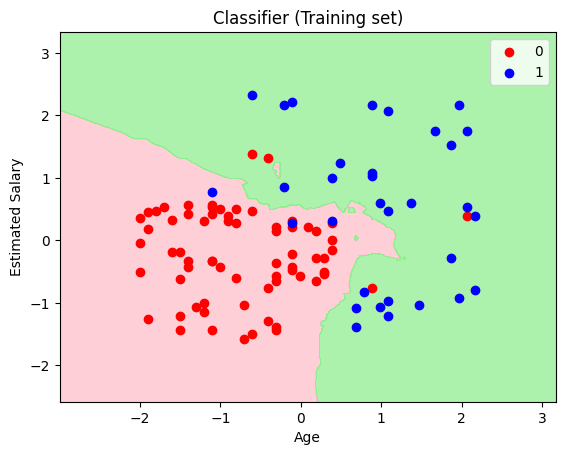

In [19]:
X_set, y_set = X_test_scaled, y_test

# Define the classifier prediction region
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1

# Generate grid points
X1, X2 = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict classifier output for each grid point
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Create contour plot
cmap = ListedColormap([np.array([255/255, 192/255, 203/255]), np.array([144/255, 238/255, 144/255])])
# Pink: #FFC0CB, Light Green: #90EE90 in RGB

plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)

# Set plot limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=[np.array([1, 0, 0]) if i == 0 else np.array([0, 0, 1])], label=j)

# Set plot title and labels
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Display the plot
plt.show()